In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from bs4 import BeautifulSoup
import nltk
import string
from collections import Counter
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
def init_document():
    """ function: init_document
        -----------------------
        initialize new empty document skeleton
        :returns: dictionary @document of document fields
        @dictionary['topics'] is a list representing topic class labels
        @dictionary['words'] is a dictionary
        @dictionary['words']['title'] is the title of the document
        @dictionary['words']['body'] is a list for the body text terms
    """
    document = { 'topics' : [], 'places' : [], 'words' : dict([]) }
    document['words']['title'] = []
    document['words']['body']  = []
    return document

In [3]:
def lemmatize(tokens):
    lemmas = []
    lmtzr = WordNetLemmatizer()
    for token in tokens:
        lemmas.append(lmtzr.lemmatize(token))
    return lemmas

In [4]:
def tokenize(text):
    translation_table = text.maketrans(string.punctuation, ' '*len(string.punctuation))
    no_punctuation = text.translate(translation_table)
    translation_table_digits = str.maketrans('','',string.digits)
    no_digits_and_punctuation = no_punctuation.translate(translation_table_digits)
    text_tokens = nltk.tokenize.word_tokenize(no_digits_and_punctuation)
    tokens_without_sw = [word for word in text_tokens if not word in nltk.corpus.stopwords.words('english')]
    english_tokens = [y for y in tokens_without_sw if wordnet.synsets(y)]
    tokens = lemmatize(english_tokens)
    for i in range(0, len(tokens)):
        tokens[i] = tokens[i].lower()
    return tokens

In [5]:
def generate_document(article):
    document = init_document()
    populate_word(document,article)
    populate_topics(document, article)
    return document

In [6]:
def populate_word(document, article):
    text = article.find('text')
    title = text.title
    body = text.body
    if title != None:
        document['words']['title'] = tokenize(title.text)
    if body != None:
        document['words']['body'] = tokenize(body.text)

In [7]:
def populate_topics(document, article):
    document['topics'].append(article.find('topics').text)
    for place in article.places.children:
        document['places'].append(place.text)
        
#def populate_topics(document, article):
 #   if 'crude' in article.topics.find_all('d'):
 #       document['topics'] = 1
 #   else:
 #       document['topics'] = 0
 #   for place in article.places.children:
 #       document['places'].append(place.text)

In [8]:
def parse_document():
    i = 0
    documents = []
    for file in os.listdir('sgm_Files'):
        data = open(os.path.join(os.getcwd(), 'sgm_Files',file), 'r')
        text = data.read()
        data.close()
        soup = BeautifulSoup(text, 'html.parser')
            
        for article in soup.find_all("reuters"):
            document = generate_document(article)
            documents.append(document)
        print("Finished extracting information from file:", file)
        if i == 0:
            return documents
    return documents

In [9]:
documents = parse_document()

Finished extracting information from file: reut2-004.sgm


In [10]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [11]:
def generate_lexicon(documents):
    """ function: generate_lexicon
        --------------------------
        generate title/body lexicon for feature selection
        :param documents: objects to generate lexicon information
        :returns: dictionary of sets for title & body lexicons
    """
    #lexicon = { 'title' : set(), 'body' : set() }
    list = [] 
    for document in documents:
        #for term in document['words']['title']:
         #   lexicon['title'].add(term)
        for term in document['words']['body']:
            list.append(term)
    return list

In [12]:
lexicon = generate_lexicon(documents)

In [ ]:
#import feature12
#import tfidf

In [ ]:
#feature12.generate_dataset(documents, lexicon)

In [ ]:
#os.chdir(r'C:\Users\aslam\OneDrive\Documents\vu\Data Science Project')
#os.getcwd()
#pd.read_csv('dataset1.csv')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=tokenize).fit(lexicon)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

6348


In [17]:
strings = []
length = []
topics = []
for i in range(len(documents)):
    strings.append(listToString(documents[i]['words']['body']))
    length.append(len(listToString(documents[i]['words']['body'])))
    topics.append(listToString(documents[i]['topics']))

#string0 = listToString(documents[0]['words']['body'])
strings

dictionary = {'text': strings, 'length' : length, 'topics': topics}
df = pd.DataFrame(dictionary, columns=['text','length','topics'])
df

,text,length,topics
0,said expect earlier reported removal jones ind...,750,
1,mason former president chief operating officer...,378,
2,in discovery complicate search aids vaccine te...,717,
3,doctors centers disease control atlanta said n...,820,
4,u s economic data week key determining u s int...,1667,interestretailipi
...,...,...,...
995,systems inc said mark a cote appointed preside...,168,
996,moody investors service inc said may downgrade...,411,
997,ct v ct prior pay april april nine,34,earn
998,ct v ct net v revs v,20,earn


In [19]:
bowow = bow_transformer.transform(strings)
print(bowow)
print(bowow.shape)

  (0, 80)	1
  (0, 92)	1
  (0, 261)	1
  (0, 790)	1
  (0, 1019)	1
  (0, 1028)	2
  (0, 1034)	1
  (0, 1035)	1
  (0, 1043)	1
  (0, 1096)	1
  (0, 1100)	1
  (0, 1800)	1
  (0, 1829)	1
  (0, 1837)	1
  (0, 1874)	1
  (0, 1903)	1
  (0, 2077)	1
  (0, 2106)	1
  (0, 2232)	1
  (0, 2801)	1
  (0, 2811)	2
  (0, 2848)	1
  (0, 2874)	5
  (0, 2889)	1
  (0, 2895)	1
  :	:
  (996, 4161)	1
  (996, 4216)	1
  (996, 4334)	1
  (996, 4344)	1
  (996, 4528)	1
  (996, 4771)	1
  (996, 4886)	1
  (996, 4917)	1
  (996, 4987)	2
  (996, 5108)	1
  (996, 5130)	2
  (996, 5182)	3
  (996, 5499)	1
  (996, 5755)	1
  (996, 6064)	1
  (997, 335)	2
  (997, 1390)	2
  (997, 3762)	1
  (997, 4047)	1
  (997, 4316)	1
  (997, 6078)	1
  (998, 1390)	2
  (998, 3735)	1
  (998, 4875)	1
  (998, 6078)	3
(1000, 6348)


In [20]:
print('Shape of Sparse Matrix: ', bowow.shape)
print('Amount of Non-Zero occurences: ', bowow.nnz)

Shape of Sparse Matrix:  (1000, 6348)
Amount of Non-Zero occurences:  46195


$sparsity = \frac{non\space zero\space occurences}{amount\space of\space elements\space in\space matrix}*100$

The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is sometimes referred to as the sparsity of the matrix.

In [21]:
sparsity = (100.0 * bowow.nnz / (bowow.shape[0] * bowow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.7277095148078135


In [22]:
tfidf_transformer = TfidfTransformer().fit(bowow)

In [23]:
messages_tfidf = tfidf_transformer.transform(bowow)
print(messages_tfidf.shape)


(1000, 6348)


# Data Visualisation

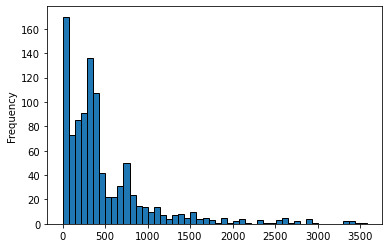

In [24]:
df['length'].plot(bins=50, kind='hist', edgecolor='black') 

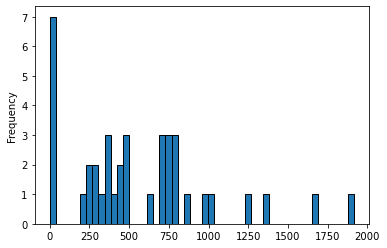

In [25]:
df_crude = df[df['topics']=='crude']
df_crude['length'].plot(bins=50, kind='hist', edgecolor='black') 

In [26]:
def contains_crude(text):
    if text.find('crude') != -1:
        return 1
    return 0

In [27]:
topic_crude = []
for i in range(len(df['topics'])):
    topic_crude.append(contains_crude(df['topics'][i]))
    
df['isCrude'] = topic_crude

In [31]:
#test = 'oilandcrude'
#contains_crude(df['topics'][i])
#test.find('crude')

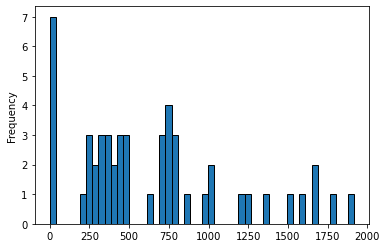

In [32]:
df_crude = df[df['isCrude']==1]
df_crude['length'].plot(bins=50, kind='hist', edgecolor='black') 

In [33]:
len(df[df['isCrude']==1]) 

51

# Training Random Forests

First Test Train Split, then fit the model and do predictions. 

In [34]:
msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['isCrude'], test_size=0.2)

In [37]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=tokenize)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [38]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function tokenize at 0x7fdcf2710b80>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [39]:
predictions = pipeline.predict(msg_test)

In [44]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       195
           1       0.42      1.00      0.59         5

    accuracy                           0.96       200
   macro avg       0.71      0.98      0.78       200
weighted avg       0.99      0.96      0.97       200

